In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import xgboost as xgb
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from lightgbm import LGBMClassifier
from sklearn import ensemble, linear_model, preprocessing, neighbors, datasets
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc, balanced_accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

#We're dealing with a multiclass classification problem with 5 possible target classes

In [156]:
#Loading the datasets
X_train = pd.read_csv('data/X_train.csv', engine='python')
X_test = pd.read_csv('data/X_test.csv', engine='python')
y_train = pd.read_csv('data/y_train.csv', engine='python')['rating']
y_test = pd.read_csv('data/y_test.csv', engine='python')['rating']

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("X_train info:", X_train.info())
print("X_train dtypes:", X_train.dtypes)


X_train shape: (51336, 7)
X_test shape: (12834, 7)
y_train shape: (51336,)
y_test shape: (12834,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   number_reviews_scaled    51336 non-null  float64
 1   review_time_encoded      51336 non-null  int64  
 2   text_word_length_scaled  51336 non-null  float64
 3   Sentiment_VADER          51336 non-null  float64
 4   Sentiment_Blob           51336 non-null  float64
 5   bow_1920                 51336 non-null  int64  
 6   local_hour               51336 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 2.7 MB
X_train info: None
X_train dtypes: number_reviews_scaled      float64
review_time_encoded          int64
text_word_length_scaled    float64
Sentiment_VADER            float64
Sentiment_Blob             float64
bow_1920                     int64
local_hour   

,number_reviews_scaled,review_time_encoded,text_word_length_scaled,Sentiment_VADER,Sentiment_Blob,bow_1920,local_hour
0,-0.674019,1,-0.261191,0.0000,0.125000,0,7
1,0.494554,1,0.790268,0.2732,-0.087500,1,8
2,-0.089733,0,0.369684,0.5994,0.386667,0,9
3,-0.089733,1,-0.103473,0.9584,0.436111,0,6
4,2.247413,1,-0.208619,0.4019,-0.033333,0,11


,number_reviews_scaled,review_time_encoded,text_word_length_scaled,Sentiment_VADER,Sentiment_Blob,bow_1920,local_hour,rating
0,2.247413,1,2.367457,0.7806,0.125556,0,-0.272568,1
1,-0.674019,1,-0.629202,-0.2263,-0.445833,0,1.366770,3
2,-0.089733,1,2.104592,-0.8011,-0.062143,0,-0.477486,1
3,-0.674019,1,1.158279,0.9698,0.283333,0,-0.887320,5
4,-0.674019,1,0.159392,-0.6324,0.057653,0,-0.682403,3


One: 20.0 %
Number of one ratings: 4313
Two: 20.0 %
Number of two ratings: 4313
Three: 20.0 %
Number of three ratings: 4313
Four: 20.0 %
Number of four ratings: 4313
Five: 20.0 %
Number of five ratings: 4313


,number_reviews_scaled,review_time_encoded,text_word_length_scaled,Sentiment_VADER,Sentiment_Blob,bow_1920,local_hour,rating
0,2.247413,1,2.367457,0.7806,0.125556,0,-0.254655,1
1,-0.674019,1,-0.629202,-0.2263,-0.445833,0,1.353202,3
2,-0.089733,1,2.104592,-0.8011,-0.062143,0,-0.455637,1
3,-0.674019,1,1.158279,0.9698,0.283333,0,-0.857601,5
4,-0.674019,1,0.159392,-0.6324,0.057653,0,-0.656619,3


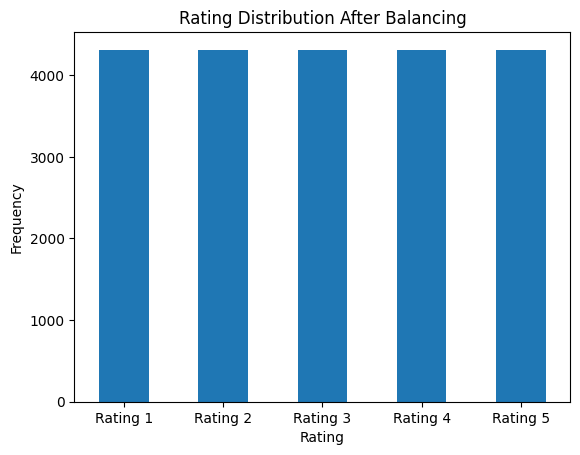

Rating 1: 20.00% Number of ratings: 4313
Rating 2: 20.00% Number of ratings: 4313
Rating 3: 20.00% Number of ratings: 4313
Rating 4: 20.00% Number of ratings: 4313
Rating 5: 20.00% Number of ratings: 4313


,number_reviews_scaled,review_time_encoded,text_word_length_scaled,Sentiment_VADER,Sentiment_Blob,bow_1920,local_hour
12058,2.247413,0,1.000560,-0.6604,0.075000,0,-1.058583
7303,-0.089733,0,-0.944640,0.0000,0.000000,0,1.755166
20704,-0.674019,0,-0.576629,-0.1531,0.000000,0,-0.455637
20528,2.247413,1,0.211965,0.3818,0.225000,0,-0.254655
5872,2.247413,1,-0.313764,-0.3612,0.416667,0,0.147309


(17252, 7)


In [119]:
#Anomaly detection

#Rejoin dataset
X_combined = pd.concat([X_train, X_test], axis=0)
y_combined = pd.concat([y_train, y_test], axis=0)
X_combined.reset_index(drop=True, inplace=True)
y_combined.reset_index(drop=True, inplace=True)
df_trustpilot = X_combined.copy()
df_trustpilot['rating'] = y_combined
df_trustpilot.reset_index(drop=True, inplace=True)
display(df_trustpilot.head())

#Display proportions
all = len(df_trustpilot)
one = df_trustpilot[df_trustpilot['rating'] == 1]
two = df_trustpilot[df_trustpilot['rating'] == 2]
three = df_trustpilot[df_trustpilot['rating'] == 3]
four = df_trustpilot[df_trustpilot['rating'] == 4]
five = df_trustpilot[df_trustpilot['rating'] == 5]
one_p = len(one)/all
two_p = len(two)/all
three_p = len(three)/all
four_p = len(four)/all
five_p = len(five)/all
print('One:',one_p*100,'%')
print("Number of one ratings:", len(one))
print('Two:',two_p*100,'%')
print("Number of two ratings:", len(two))
print('Three:',three_p*100,'%')
print("Number of three ratings:", len(three))
print('Four:',four_p*100,'%')
print("Number of four ratings:", len(four))
print('Five:',five_p*100,'%')
print("Number of five ratings:", len(five))

#Normalize the last feature
df_trustpilot['local_hour'] = StandardScaler().fit_transform(df_trustpilot['local_hour'].values.reshape(-1,1))
display(df_trustpilot.head())

#Rebalance the dataset
df_balanced = df_trustpilot.sample(frac=1, random_state=42)
rating_1 = df_balanced[df_balanced['rating'] == 1][:4313] 
rating_2 = df_balanced[df_balanced['rating'] == 2][:4313]      
rating_3 = df_balanced[df_balanced['rating'] == 3][:4313]  
rating_4 = df_balanced[df_balanced['rating'] == 4][:4313]  
rating_5 = df_balanced[df_balanced['rating'] == 5][:4313]  
df_balanced_final = pd.concat([rating_1, rating_2, rating_3, rating_4, rating_5])
df_balanced_final = df_balanced_final.sample(frac=1, random_state=42)
labels = ['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5']
classes = pd.value_counts(df_balanced_final['rating'], sort=True)
classes.plot(kind='bar', rot=0)
plt.title("Rating Distribution After Balancing")
plt.xticks(range(5), labels)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()
for rating in range(1, 6):
    count = len(df_balanced_final[df_balanced_final['rating'] == rating])
    percentage = (count / len(df_balanced_final)) * 100
    print(f"Rating {rating}: {percentage:.2f}% Number of ratings: {count}")

X = df_balanced_final.drop('rating', axis=1)
y = df_balanced_final['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

display(X.head())
print(X_train.shape)




In [ ]:
#Anomaly detection code - testing base model

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')
warnings.filterwarnings('ignore', category=FutureWarning, module='imblearn')
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')

#Dataset modifications
X_train = pd.read_csv('data/X_train.csv', engine='python')
X_test = pd.read_csv('data/X_test.csv', engine='python')
y_train = pd.read_csv('data/y_train.csv', engine='python')['rating']
y_test = pd.read_csv('data/y_test.csv', engine='python')['rating']
X_combined = pd.concat([X_train, X_test], axis=0)
y_combined = pd.concat([y_train, y_test], axis=0)
X_combined.reset_index(drop=True, inplace=True)
y_combined.reset_index(drop=True, inplace=True)
df_trustpilot = X_combined.copy()
df_trustpilot['rating'] = y_combined
df_trustpilot.reset_index(drop=True, inplace=True)
display(df_trustpilot.head())
all = len(df_trustpilot)
one = df_trustpilot[df_trustpilot['rating'] == 1]
two = df_trustpilot[df_trustpilot['rating'] == 2]
three = df_trustpilot[df_trustpilot['rating'] == 3]
four = df_trustpilot[df_trustpilot['rating'] == 4]
five = df_trustpilot[df_trustpilot['rating'] == 5]
one_p = len(one)/all
two_p = len(two)/all
three_p = len(three)/all
four_p = len(four)/all
five_p = len(five)/all
print('One:',one_p*100,'%')
print("Number of one ratings:", len(one))
print('Two:',two_p*100,'%')
print("Number of two ratings:", len(two))
print('Three:',three_p*100,'%')
print("Number of three ratings:", len(three))
print('Four:',four_p*100,'%')
print("Number of four ratings:", len(four))
print('Five:',five_p*100,'%')
print("Number of five ratings:", len(five))

#Scale local_hour
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#Rebalance the dataset
df_balanced = df_trustpilot.sample(frac=1, random_state=42)
rating_1 = df_balanced[df_balanced['rating'] == 1][:4313] 
rating_2 = df_balanced[df_balanced['rating'] == 2][:4313]      
rating_3 = df_balanced[df_balanced['rating'] == 3][:4313]  
rating_4 = df_balanced[df_balanced['rating'] == 4][:4313]  
rating_5 = df_balanced[df_balanced['rating'] == 5][:4313]  
df_balanced_final = pd.concat([rating_1, rating_2, rating_3, rating_4, rating_5])
df_balanced_final = df_balanced_final.sample(frac=1, random_state=42)
labels = ['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5']
classes = pd.value_counts(df_balanced_final['rating'], sort=True)
classes.plot(kind='bar', rot=0)
plt.title("Rating Distribution After Balancing")
plt.xticks(range(5), labels)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()
for rating in range(1, 6):
    count = len(df_balanced_final[df_balanced_final['rating'] == rating])
    percentage = (count / len(df_balanced_final)) * 100
    print(f"Rating {rating}: {percentage:.2f}% Number of ratings: {count}")
X = df_balanced_final.drop('rating', axis=1)
y = df_balanced_final['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

#Base model - Logistic regression
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
custom_weights = {1: 2.0, 2: 7.0, 3: 5.0, 4: 5.0, 5: 1.0}
param_grid_lr = {'C': [0.001, 0.01, 0.1], 'class_weight': ['balanced', 'balanced_subsample'], 'solver': ['lbfgs'], 'max_iter': [100, 200, 500]}
param_grid_lr['class_weight'].append(custom_weights)
grid_search_lr = GridSearchCV(LogisticRegression(random_state=25, max_iter=2000), param_grid_lr, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print("Best Base Model parameters found:", grid_search_lr.best_params_)
print("Best Base Model cross-validation score:", grid_search_lr.best_score_)

model = LogisticRegression(**grid_search_lr.best_params_, random_state=25)
model.fit(X_train, y_train)
base_model_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
base_model_cr = classification_report(y_test, y_pred)
base_model_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
base_model_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Accuracy Base Model: ", base_model_score * 100, "%")
print("Balanced Accuracy Base Model: ", base_model_balanced_accuracy * 100, "%")
print("ROC AUC Base Model: ", base_model_roc_auc * 100, "%")
print("Classification Report Base Model: ", "\n", base_model_cr)

#Bagging Classifier
param_grid_bc = {'n_estimators': [400, 500, 600], 'max_samples': [0.5, 0.6, 0.7], 'max_features': [0.4, 0.5, 0.6], 'bootstrap_features': [True, False]}
grid_search_bc = GridSearchCV(BaggingClassifier(estimator=LogisticRegression(**grid_search_lr.best_params_, random_state=25), bootstrap=True, n_jobs=-1, random_state=25),
    param_grid_bc, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_bc.fit(X_train, y_train)
print("Best Bagging Classifier parameters:", grid_search_bc.best_params_)
print("Best Bagging Classifier cross-validation score:", grid_search_bc.best_score_)

bc = BaggingClassifier(estimator=model, **grid_search_bc.best_params_, bootstrap=True, n_jobs=-1, random_state=25)
bc.fit(X_train, y_train)
score_bc = bc.score(X_test, y_test)
y_pred_bc = bc.predict(X_test)
cr_bc = classification_report(y_test, y_pred_bc)
balanced_accuracy_bc = balanced_accuracy_score(y_test, y_pred_bc)
roc_auc_bc = roc_auc_score(y_test, bc.predict_proba(X_test), multi_class='ovr')
print("Accuracy Bagging Classifier: ", score_bc * 100, "%")
print("Balanced Accuracy Bagging Classifier: ", balanced_accuracy_bc * 100, "%")
print("ROC AUC Bagging Classifier: ", roc_auc_bc * 100, "%")
print("Classification Report Bagging Classifier: ", "\n", cr_bc)

#Adaptive Boosting
param_grid_ac = {'n_estimators': [10, 50, 100], 'learning_rate': [0.001, 0.01, 0.1], 'algorithm': ['SAMME']}
grid_search_ac = GridSearchCV(AdaBoostClassifier(estimator=LogisticRegression(**grid_search_lr.best_params_, random_state=25),random_state=25),
    param_grid_ac, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_ac.fit(X_train, y_train)
print("Best AdaBoost parameters:", grid_search_ac.best_params_)
print("Best AdaBoost score:", grid_search_ac.best_score_)

ac = AdaBoostClassifier(estimator=model, **grid_search_ac.best_params_, random_state=25)
ac.fit(X_train, y_train)
score_ac = ac.score(X_test, y_test)
y_pred_ac = ac.predict(X_test)
cr_ac = classification_report(y_test, y_pred_ac)
balanced_accuracy_ac = balanced_accuracy_score(y_test, y_pred_ac)
roc_auc_ac = roc_auc_score(y_test, ac.predict_proba(X_test), multi_class='ovr')
print("Accuracy Adaptive Boosting Classifier: ", score_ac * 100, "%")
print("Balanced Accuracy Adaptive Boosting Classifier: ", balanced_accuracy_ac * 100, "%")
print("ROC AUC Adaptive Boosting Classifier: ", roc_auc_ac * 100, "%")
print("Classification Report Adaptive Boosting Classifier: ", "\n", cr_ac)

#Gradient Boosting Classifier
param_grid_gb = {'n_estimators': [200, 300], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'subsample': [0.8, 1.0]}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=25),
    param_grid_gb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
print("Best Gradient Boosting parameters:", grid_search_gb.best_params_)
print("Best Gradient Boosting score:", grid_search_gb.best_score_)

gb = GradientBoostingClassifier(**grid_search_gb.best_params_, random_state=25)
gb.fit(X_train, y_train)
score_gb = gb.score(X_test, y_test)
y_pred_gb = gb.predict(X_test)
cr_gb = classification_report(y_test, y_pred_gb)
balanced_accuracy_gb = balanced_accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, gb.predict_proba(X_test), multi_class='ovr')
print("Accuracy Gradient Boosting Classifier: ", score_gb * 100, "%")
print("Balanced Accuracy Gradient Boosting Classifier: ", balanced_accuracy_gb * 100, "%")
print("ROC AUC Gradient Boosting Classifier: ", roc_auc_gb * 100, "%")
print("Classification Report Gradient Boosting Classifier: ", "\n", cr_gb)

#LightGBM Classifier
param_grid_lgb = {'n_estimators': [200, 300], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'num_leaves': [31, 127], 'subsample': [0.8, 1.0]}
grid_search_lgb = GridSearchCV(LGBMClassifier(random_state=25, objective='multiclass'),
    param_grid_lgb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)
print("Best LightGBM parameters:", grid_search_lgb.best_params_)
print("Best LightGBM score:", grid_search_lgb.best_score_)

lgb = LGBMClassifier(**grid_search_lgb.best_params_, random_state=25, objective='multiclass')
lgb.fit(X_train, y_train)
score_lgb = lgb.score(X_test, y_test)
y_pred_lgb = lgb.predict(X_test)
cr_lgb = classification_report(y_test, y_pred_lgb)
balanced_accuracy_lgb = balanced_accuracy_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, lgb.predict_proba(X_test), multi_class='ovr')
print("Accuracy LightGBM Classifier: ", score_lgb * 100, "%")
print("Balanced Accuracy LightGBM Classifier: ", balanced_accuracy_lgb * 100, "%")
print("ROC AUC LightGBM Classifier: ", roc_auc_lgb * 100, "%")
print("Classification Report LightGBM Classifier: ", "\n", cr_lgb)

#Balanced Random Forest Classifier
param_grid_brf = {'n_estimators': [300], 'max_depth': [4, 5], 'min_samples_split': [2, 3], 'min_samples_leaf': [1], 'sampling_strategy': ['auto', 'all']}
grid_search_brf = GridSearchCV(BalancedRandomForestClassifier(random_state=25),
    param_grid_brf, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_brf.fit(X_train, y_train)
print("Best Balanced Random Forest parameters:", grid_search_brf.best_params_)
print("Best Balanced Random Forest score:", grid_search_brf.best_score_)

brf = BalancedRandomForestClassifier(**grid_search_brf.best_params_, random_state=25)
brf.fit(X_train, y_train)
score_brf = brf.score(X_test, y_test)
y_pred_brf = brf.predict(X_test)
cr_brf = classification_report(y_test, y_pred_brf)
balanced_accuracy_brf = balanced_accuracy_score(y_test, y_pred_brf)
roc_auc_brf = roc_auc_score(y_test, brf.predict_proba(X_test), multi_class='ovr')
print("Accuracy Balanced Random Forest Classifier: ", score_brf * 100, "%")
print("Balanced Accuracy Balanced Random Forest Classifier: ", balanced_accuracy_brf * 100, "%")
print("ROC AUC Balanced Random Forest Classifier: ", roc_auc_brf * 100, "%")
print("Classification Report Balanced Random Forest Classifier: ", "\n", cr_brf)

#XGBoost Classifier
param_grid_xgb = {'n_estimators': [300], 'learning_rate': [0.1], 'max_depth': [4, 5], 'min_child_weight': [1, 2], 'subsample': [0.5, 0.8]}
grid_search_xgb = GridSearchCV(XGBClassifier(objective='multi:softprob', num_class=5, random_state=25),
    param_grid_xgb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train - 1)
print("Best XGBoost parameters:", grid_search_xgb.best_params_)
print("Best XGBoost score:", grid_search_xgb.best_score_)

xgb = XGBClassifier(**grid_search_xgb.best_params_, objective='multi:softprob', num_class=5, random_state=25)
xgb.fit(X_train, y_train - 1)
score_xgb = xgb.score(X_test, y_test - 1)
y_pred_xgb = xgb.predict(X_test) + 1  
cr_xgb = classification_report(y_test, y_pred_xgb)
balanced_accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test), multi_class='ovr')
print("Accuracy XGBoost Classifier: ", score_xgb * 100, "%")
print("Balanced Accuracy XGBoost Classifier: ", balanced_accuracy_xgb * 100, "%")
print("ROC AUC XGBoost Classifier: ", roc_auc_xgb * 100, "%")
print("Classification Report XGBoost Classifier: ", "\n", cr_xgb)

#Initialize base classifiers
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(random_state=25)

#Voting Classifier
vclf = VotingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', model)], voting='hard')
vclf.fit(X_train, y_train)
score_vclf = vclf.score(X_test, y_test)
y_pred_vclf = vclf.predict(X_test)
cr_vclf = classification_report(y_test, y_pred_vclf)
balanced_accuracy_vclf = balanced_accuracy_score(y_test, y_pred_vclf)

print("Voting Classifier Accuracy:", score_vclf * 100, "%")
print("Voting Classifier Balanced Accuracy:", balanced_accuracy_vclf * 100, "%")
print("Voting Classifier Classification Report:\n", cr_vclf)

#Stacking Classifier
sclf = StackingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', model)], final_estimator=LogisticRegression(random_state=25), cv=5)
sclf.fit(X_train, y_train)
score_sclf = sclf.score(X_test, y_test)
y_pred_sclf = sclf.predict(X_test)
cr_sclf = classification_report(y_test, y_pred_sclf)
balanced_accuracy_sclf = balanced_accuracy_score(y_test, y_pred_sclf)

print("\nStacking Classifier Accuracy:", score_sclf * 100, "%")
print("Stacking Classifier Balanced Accuracy:", balanced_accuracy_sclf * 100, "%")
print("Stacking Classifier Classification Report:\n", cr_sclf)


In [6]:
#Non-anomaly detection code - testing base model

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')
warnings.filterwarnings('ignore', category=FutureWarning, module='imblearn')
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')
X_train = pd.read_csv('data/X_train.csv', engine='python')
X_test = pd.read_csv('data/X_test.csv', engine='python')
y_train = pd.read_csv('data/y_train.csv', engine='python')['rating']
y_test = pd.read_csv('data/y_test.csv', engine='python')['rating']

#Scale local_hour
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#Base model - Logistic regression
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
custom_weights = {1: 2.0, 2: 7.0, 3: 5.0, 4: 5.0, 5: 1.0}
param_grid_lr = {'C': [0.001, 0.01, 0.1], 'class_weight': ['balanced', 'balanced_subsample'], 'solver': ['lbfgs'], 'max_iter': [100, 200, 500]}
param_grid_lr['class_weight'].append(custom_weights)
grid_search_lr = GridSearchCV(LogisticRegression(random_state=25, max_iter=2000), param_grid_lr, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print("Best Base Model parameters found:", grid_search_lr.best_params_)
print("Best Base Model cross-validation score:", grid_search_lr.best_score_)

model = LogisticRegression(**grid_search_lr.best_params_, random_state=25)
model.fit(X_train, y_train)
base_model_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
base_model_cr = classification_report(y_test, y_pred)
base_model_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
base_model_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Accuracy Base Model: ", base_model_score * 100, "%")
print("Balanced Accuracy Base Model: ", base_model_balanced_accuracy * 100, "%")
print("ROC AUC Base Model: ", base_model_roc_auc * 100, "%")
print("Classification Report Base Model: ", "\n", base_model_cr)

#Bagging Classifier
param_grid_bc = {'n_estimators': [400, 500, 600], 'max_samples': [0.5, 0.6, 0.7], 'max_features': [0.4, 0.5, 0.6], 'bootstrap_features': [True, False]}
grid_search_bc = GridSearchCV(BaggingClassifier(estimator=LogisticRegression(**grid_search_lr.best_params_, random_state=25), bootstrap=True, n_jobs=-1, random_state=25),
    param_grid_bc, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_bc.fit(X_train, y_train)
print("Best Bagging Classifier parameters:", grid_search_bc.best_params_)
print("Best Bagging Classifier cross-validation score:", grid_search_bc.best_score_)

bc = BaggingClassifier(estimator=model, **grid_search_bc.best_params_, bootstrap=True, n_jobs=-1, random_state=25)
bc.fit(X_train, y_train)
score_bc = bc.score(X_test, y_test)
y_pred_bc = bc.predict(X_test)
cr_bc = classification_report(y_test, y_pred_bc)
balanced_accuracy_bc = balanced_accuracy_score(y_test, y_pred_bc)
roc_auc_bc = roc_auc_score(y_test, bc.predict_proba(X_test), multi_class='ovr')
print("Accuracy Bagging Classifier: ", score_bc * 100, "%")
print("Balanced Accuracy Bagging Classifier: ", balanced_accuracy_bc * 100, "%")
print("ROC AUC Bagging Classifier: ", roc_auc_bc * 100, "%")
print("Classification Report Bagging Classifier: ", "\n", cr_bc)

#Adaptive Boosting
param_grid_ac = {'n_estimators': [10, 50, 100], 'learning_rate': [0.001, 0.01, 0.1], 'algorithm': ['SAMME']}
grid_search_ac = GridSearchCV(AdaBoostClassifier(estimator=LogisticRegression(**grid_search_lr.best_params_, random_state=25),random_state=25),
    param_grid_ac, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_ac.fit(X_train, y_train)
print("Best AdaBoost parameters:", grid_search_ac.best_params_)
print("Best AdaBoost score:", grid_search_ac.best_score_)

ac = AdaBoostClassifier(estimator=model, **grid_search_ac.best_params_, random_state=25)
ac.fit(X_train, y_train)
score_ac = ac.score(X_test, y_test)
y_pred_ac = ac.predict(X_test)
cr_ac = classification_report(y_test, y_pred_ac)
balanced_accuracy_ac = balanced_accuracy_score(y_test, y_pred_ac)
roc_auc_ac = roc_auc_score(y_test, ac.predict_proba(X_test), multi_class='ovr')
print("Accuracy Adaptive Boosting Classifier: ", score_ac * 100, "%")
print("Balanced Accuracy Adaptive Boosting Classifier: ", balanced_accuracy_ac * 100, "%")
print("ROC AUC Adaptive Boosting Classifier: ", roc_auc_ac * 100, "%")
print("Classification Report Adaptive Boosting Classifier: ", "\n", cr_ac)

#Gradient Boosting Classifier
param_grid_gb = {'n_estimators': [200, 300], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'subsample': [0.8, 1.0]}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=25),
    param_grid_gb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
print("Best Gradient Boosting parameters:", grid_search_gb.best_params_)
print("Best Gradient Boosting score:", grid_search_gb.best_score_)

gb = GradientBoostingClassifier(**grid_search_gb.best_params_, random_state=25)
gb.fit(X_train, y_train)
score_gb = gb.score(X_test, y_test)
y_pred_gb = gb.predict(X_test)
cr_gb = classification_report(y_test, y_pred_gb)
balanced_accuracy_gb = balanced_accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, gb.predict_proba(X_test), multi_class='ovr')
print("Accuracy Gradient Boosting Classifier: ", score_gb * 100, "%")
print("Balanced Accuracy Gradient Boosting Classifier: ", balanced_accuracy_gb * 100, "%")
print("ROC AUC Gradient Boosting Classifier: ", roc_auc_gb * 100, "%")
print("Classification Report Gradient Boosting Classifier: ", "\n", cr_gb)

#LightGBM Classifier
param_grid_lgb = {'n_estimators': [200, 300], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'num_leaves': [31, 127], 'subsample': [0.8, 1.0]}
grid_search_lgb = GridSearchCV(LGBMClassifier(random_state=25, objective='multiclass'),
    param_grid_lgb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)
print("Best LightGBM parameters:", grid_search_lgb.best_params_)
print("Best LightGBM score:", grid_search_lgb.best_score_)

lgb = LGBMClassifier(**grid_search_lgb.best_params_, random_state=25, objective='multiclass')
lgb.fit(X_train, y_train)
score_lgb = lgb.score(X_test, y_test)
y_pred_lgb = lgb.predict(X_test)
cr_lgb = classification_report(y_test, y_pred_lgb)
balanced_accuracy_lgb = balanced_accuracy_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, lgb.predict_proba(X_test), multi_class='ovr')
print("Accuracy LightGBM Classifier: ", score_lgb * 100, "%")
print("Balanced Accuracy LightGBM Classifier: ", balanced_accuracy_lgb * 100, "%")
print("ROC AUC LightGBM Classifier: ", roc_auc_lgb * 100, "%")
print("Classification Report LightGBM Classifier: ", "\n", cr_lgb)

#Balanced Random Forest Classifier
param_grid_brf = {'n_estimators': [300], 'max_depth': [4, 5], 'min_samples_split': [2, 3], 'min_samples_leaf': [1], 'sampling_strategy': ['auto', 'all']}
grid_search_brf = GridSearchCV(BalancedRandomForestClassifier(random_state=25),
    param_grid_brf, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_brf.fit(X_train, y_train)
print("Best Balanced Random Forest parameters:", grid_search_brf.best_params_)
print("Best Balanced Random Forest score:", grid_search_brf.best_score_)

brf = BalancedRandomForestClassifier(**grid_search_brf.best_params_, random_state=25)
brf.fit(X_train, y_train)
score_brf = brf.score(X_test, y_test)
y_pred_brf = brf.predict(X_test)
cr_brf = classification_report(y_test, y_pred_brf)
balanced_accuracy_brf = balanced_accuracy_score(y_test, y_pred_brf)
roc_auc_brf = roc_auc_score(y_test, brf.predict_proba(X_test), multi_class='ovr')
print("Accuracy Balanced Random Forest Classifier: ", score_brf * 100, "%")
print("Balanced Accuracy Balanced Random Forest Classifier: ", balanced_accuracy_brf * 100, "%")
print("ROC AUC Balanced Random Forest Classifier: ", roc_auc_brf * 100, "%")
print("Classification Report Balanced Random Forest Classifier: ", "\n", cr_brf)

#XGBoost Classifier
param_grid_xgb = {'n_estimators': [300], 'learning_rate': [0.1], 'max_depth': [4, 5], 'min_child_weight': [1, 2], 'subsample': [0.5, 0.8]}
grid_search_xgb = GridSearchCV(XGBClassifier(objective='multi:softprob', num_class=5, random_state=25),
    param_grid_xgb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train - 1)
print("Best XGBoost parameters:", grid_search_xgb.best_params_)
print("Best XGBoost score:", grid_search_xgb.best_score_)

xgb = XGBClassifier(**grid_search_xgb.best_params_, objective='multi:softprob', num_class=5, random_state=25)
xgb.fit(X_train, y_train - 1)
score_xgb = xgb.score(X_test, y_test - 1)
y_pred_xgb = xgb.predict(X_test) + 1  
cr_xgb = classification_report(y_test, y_pred_xgb)
balanced_accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test), multi_class='ovr')
print("Accuracy XGBoost Classifier: ", score_xgb * 100, "%")
print("Balanced Accuracy XGBoost Classifier: ", balanced_accuracy_xgb * 100, "%")
print("ROC AUC XGBoost Classifier: ", roc_auc_xgb * 100, "%")
print("Classification Report XGBoost Classifier: ", "\n", cr_xgb)

#Initialize base classifiers
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(random_state=25)

#Voting Classifier
vclf = VotingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', model)], voting='hard')
vclf.fit(X_train, y_train)
score_vclf = vclf.score(X_test, y_test)
y_pred_vclf = vclf.predict(X_test)
cr_vclf = classification_report(y_test, y_pred_vclf)
balanced_accuracy_vclf = balanced_accuracy_score(y_test, y_pred_vclf)

print("Voting Classifier Accuracy:", score_vclf * 100, "%")
print("Voting Classifier Balanced Accuracy:", balanced_accuracy_vclf * 100, "%")
print("Voting Classifier Classification Report:\n", cr_vclf)

#Stacking Classifier
sclf = StackingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', model)], final_estimator=LogisticRegression(random_state=25), cv=5)
sclf.fit(X_train, y_train)
score_sclf = sclf.score(X_test, y_test)
y_pred_sclf = sclf.predict(X_test)
cr_sclf = classification_report(y_test, y_pred_sclf)
balanced_accuracy_sclf = balanced_accuracy_score(y_test, y_pred_sclf)

print("\nStacking Classifier Accuracy:", score_sclf * 100, "%")
print("Stacking Classifier Balanced Accuracy:", balanced_accuracy_sclf * 100, "%")
print("Stacking Classifier Classification Report:\n", cr_sclf)

Best Base Model parameters found: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'lbfgs'}
Best Base Model cross-validation score: 0.42440570501744573
Accuracy Base Model:  57.55025712949977 %
Balanced Accuracy Base Model:  43.24908905184519 %
ROC AUC Base Model:  79.20198971687297 %
Classification Report Base Model:  
               precision    recall  f1-score   support

           1       0.74      0.63      0.68      3188
           2       0.17      0.23      0.20       863
           3       0.23      0.31      0.26      1254
           4       0.17      0.29      0.22      1257
           5       0.85      0.71      0.77      6272

    accuracy                           0.58     12834
   macro avg       0.43      0.43      0.43     12834
weighted avg       0.65      0.58      0.61     12834



In [ ]:
#Non-anomaly detection code - testing base model with Random Oversampling

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')
warnings.filterwarnings('ignore', category=FutureWarning, module='imblearn')
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')
X_train = pd.read_csv('data/X_train.csv', engine='python')
X_test = pd.read_csv('data/X_test.csv', engine='python')
y_train = pd.read_csv('data/y_train.csv', engine='python')['rating']
y_test = pd.read_csv('data/y_test.csv', engine='python')['rating']

#Scale local_hour
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#Apply Random Oversampling
ros = RandomOverSampler(random_state=25)
X_train, y_train = ros.fit_resample(X_train, y_train)
print("Class distribution after oversampling:", dict(pd.Series(y_train).value_counts()))

#Base model - Logistic regression
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
custom_weights = {1: 2.0, 2: 7.0, 3: 5.0, 4: 5.0, 5: 1.0}
param_grid_lr = {'C': [0.001, 0.01, 0.1], 'class_weight': ['balanced', 'balanced_subsample'], 'solver': ['lbfgs'], 'max_iter': [100, 200, 500]}
param_grid_lr['class_weight'].append(custom_weights)
grid_search_lr = GridSearchCV(LogisticRegression(random_state=25, max_iter=2000), param_grid_lr, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print("Best Base Model parameters found:", grid_search_lr.best_params_)
print("Best Base Model cross-validation score:", grid_search_lr.best_score_)

model = LogisticRegression(**grid_search_lr.best_params_, random_state=25)
model.fit(X_train, y_train)
base_model_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
base_model_cr = classification_report(y_test, y_pred)
base_model_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
base_model_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Accuracy Base Model: ", base_model_score * 100, "%")
print("Balanced Accuracy Base Model: ", base_model_balanced_accuracy * 100, "%")
print("ROC AUC Base Model: ", base_model_roc_auc * 100, "%")
print("Classification Report Base Model: ", "\n", base_model_cr)

#Bagging Classifier
param_grid_bc = {'n_estimators': [400, 500, 600], 'max_samples': [0.5, 0.6, 0.7], 'max_features': [0.4, 0.5, 0.6], 'bootstrap_features': [True, False]}
grid_search_bc = GridSearchCV(BaggingClassifier(estimator=LogisticRegression(**grid_search_lr.best_params_, random_state=25), bootstrap=True, n_jobs=-1, random_state=25),
    param_grid_bc, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_bc.fit(X_train, y_train)
print("Best Bagging Classifier parameters:", grid_search_bc.best_params_)
print("Best Bagging Classifier cross-validation score:", grid_search_bc.best_score_)

bc = BaggingClassifier(estimator=model, **grid_search_bc.best_params_, bootstrap=True, n_jobs=-1, random_state=25)
bc.fit(X_train, y_train)
score_bc = bc.score(X_test, y_test)
y_pred_bc = bc.predict(X_test)
cr_bc = classification_report(y_test, y_pred_bc)
balanced_accuracy_bc = balanced_accuracy_score(y_test, y_pred_bc)
roc_auc_bc = roc_auc_score(y_test, bc.predict_proba(X_test), multi_class='ovr')
print("Accuracy Bagging Classifier: ", score_bc * 100, "%")
print("Balanced Accuracy Bagging Classifier: ", balanced_accuracy_bc * 100, "%")
print("ROC AUC Bagging Classifier: ", roc_auc_bc * 100, "%")
print("Classification Report Bagging Classifier: ", "\n", cr_bc)

#Adaptive Boosting
param_grid_ac = {'n_estimators': [10, 50, 100], 'learning_rate': [0.001, 0.01, 0.1], 'algorithm': ['SAMME']}
grid_search_ac = GridSearchCV(AdaBoostClassifier(estimator=LogisticRegression(**grid_search_lr.best_params_, random_state=25),random_state=25),
    param_grid_ac, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_ac.fit(X_train, y_train)
print("Best AdaBoost parameters:", grid_search_ac.best_params_)
print("Best AdaBoost score:", grid_search_ac.best_score_)

ac = AdaBoostClassifier(estimator=model, **grid_search_ac.best_params_, random_state=25)
ac.fit(X_train, y_train)
score_ac = ac.score(X_test, y_test)
y_pred_ac = ac.predict(X_test)
cr_ac = classification_report(y_test, y_pred_ac)
balanced_accuracy_ac = balanced_accuracy_score(y_test, y_pred_ac)
roc_auc_ac = roc_auc_score(y_test, ac.predict_proba(X_test), multi_class='ovr')
print("Accuracy Adaptive Boosting Classifier: ", score_ac * 100, "%")
print("Balanced Accuracy Adaptive Boosting Classifier: ", balanced_accuracy_ac * 100, "%")
print("ROC AUC Adaptive Boosting Classifier: ", roc_auc_ac * 100, "%")
print("Classification Report Adaptive Boosting Classifier: ", "\n", cr_ac)

#Gradient Boosting Classifier
param_grid_gb = {'n_estimators': [200, 300], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'subsample': [0.8, 1.0]}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=25),
    param_grid_gb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
print("Best Gradient Boosting parameters:", grid_search_gb.best_params_)
print("Best Gradient Boosting score:", grid_search_gb.best_score_)

gb = GradientBoostingClassifier(**grid_search_gb.best_params_, random_state=25)
gb.fit(X_train, y_train)
score_gb = gb.score(X_test, y_test)
y_pred_gb = gb.predict(X_test)
cr_gb = classification_report(y_test, y_pred_gb)
balanced_accuracy_gb = balanced_accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, gb.predict_proba(X_test), multi_class='ovr')
print("Accuracy Gradient Boosting Classifier: ", score_gb * 100, "%")
print("Balanced Accuracy Gradient Boosting Classifier: ", balanced_accuracy_gb * 100, "%")
print("ROC AUC Gradient Boosting Classifier: ", roc_auc_gb * 100, "%")
print("Classification Report Gradient Boosting Classifier: ", "\n", cr_gb)

#LightGBM Classifier
param_grid_lgb = {'n_estimators': [200, 300], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'num_leaves': [31, 127], 'subsample': [0.8, 1.0]}
grid_search_lgb = GridSearchCV(LGBMClassifier(random_state=25, objective='multiclass'),
    param_grid_lgb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)
print("Best LightGBM parameters:", grid_search_lgb.best_params_)
print("Best LightGBM score:", grid_search_lgb.best_score_)

lgb = LGBMClassifier(**grid_search_lgb.best_params_, random_state=25, objective='multiclass')
lgb.fit(X_train, y_train)
score_lgb = lgb.score(X_test, y_test)
y_pred_lgb = lgb.predict(X_test)
cr_lgb = classification_report(y_test, y_pred_lgb)
balanced_accuracy_lgb = balanced_accuracy_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, lgb.predict_proba(X_test), multi_class='ovr')
print("Accuracy LightGBM Classifier: ", score_lgb * 100, "%")
print("Balanced Accuracy LightGBM Classifier: ", balanced_accuracy_lgb * 100, "%")
print("ROC AUC LightGBM Classifier: ", roc_auc_lgb * 100, "%")
print("Classification Report LightGBM Classifier: ", "\n", cr_lgb)

#Balanced Random Forest Classifier
param_grid_brf = {'n_estimators': [300], 'max_depth': [4, 5], 'min_samples_split': [2, 3], 'min_samples_leaf': [1], 'sampling_strategy': ['auto', 'all']}
grid_search_brf = GridSearchCV(BalancedRandomForestClassifier(random_state=25),
    param_grid_brf, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_brf.fit(X_train, y_train)
print("Best Balanced Random Forest parameters:", grid_search_brf.best_params_)
print("Best Balanced Random Forest score:", grid_search_brf.best_score_)

brf = BalancedRandomForestClassifier(**grid_search_brf.best_params_, random_state=25)
brf.fit(X_train, y_train)
score_brf = brf.score(X_test, y_test)
y_pred_brf = brf.predict(X_test)
cr_brf = classification_report(y_test, y_pred_brf)
balanced_accuracy_brf = balanced_accuracy_score(y_test, y_pred_brf)
roc_auc_brf = roc_auc_score(y_test, brf.predict_proba(X_test), multi_class='ovr')
print("Accuracy Balanced Random Forest Classifier: ", score_brf * 100, "%")
print("Balanced Accuracy Balanced Random Forest Classifier: ", balanced_accuracy_brf * 100, "%")
print("ROC AUC Balanced Random Forest Classifier: ", roc_auc_brf * 100, "%")
print("Classification Report Balanced Random Forest Classifier: ", "\n", cr_brf)

#XGBoost Classifier
param_grid_xgb = {'n_estimators': [300], 'learning_rate': [0.1], 'max_depth': [4, 5], 'min_child_weight': [1, 2], 'subsample': [0.5, 0.8]}
grid_search_xgb = GridSearchCV(XGBClassifier(objective='multi:softprob', num_class=5, random_state=25),
    param_grid_xgb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train - 1)
print("Best XGBoost parameters:", grid_search_xgb.best_params_)
print("Best XGBoost score:", grid_search_xgb.best_score_)

xgb = XGBClassifier(**grid_search_xgb.best_params_, objective='multi:softprob', num_class=5, random_state=25)
xgb.fit(X_train, y_train - 1)
score_xgb = xgb.score(X_test, y_test - 1)
y_pred_xgb = xgb.predict(X_test) + 1  
cr_xgb = classification_report(y_test, y_pred_xgb)
balanced_accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test), multi_class='ovr')
print("Accuracy XGBoost Classifier: ", score_xgb * 100, "%")
print("Balanced Accuracy XGBoost Classifier: ", balanced_accuracy_xgb * 100, "%")
print("ROC AUC XGBoost Classifier: ", roc_auc_xgb * 100, "%")
print("Classification Report XGBoost Classifier: ", "\n", cr_xgb)

#Initialize base classifiers
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(random_state=25)

#Voting Classifier
vclf = VotingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', model)], voting='hard')
vclf.fit(X_train, y_train)
score_vclf = vclf.score(X_test, y_test)
y_pred_vclf = vclf.predict(X_test)
cr_vclf = classification_report(y_test, y_pred_vclf)
balanced_accuracy_vclf = balanced_accuracy_score(y_test, y_pred_vclf)

print("Voting Classifier Accuracy:", score_vclf * 100, "%")
print("Voting Classifier Balanced Accuracy:", balanced_accuracy_vclf * 100, "%")
print("Voting Classifier Classification Report:\n", cr_vclf)

#Stacking Classifier
sclf = StackingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', model)], final_estimator=LogisticRegression(random_state=25), cv=5)
sclf.fit(X_train, y_train)
score_sclf = sclf.score(X_test, y_test)
y_pred_sclf = sclf.predict(X_test)
cr_sclf = classification_report(y_test, y_pred_sclf)
balanced_accuracy_sclf = balanced_accuracy_score(y_test, y_pred_sclf)

print("\nStacking Classifier Accuracy:", score_sclf * 100, "%")
print("Stacking Classifier Balanced Accuracy:", balanced_accuracy_sclf * 100, "%")
print("Stacking Classifier Classification Report:\n", cr_sclf)

In [ ]:
#Non-anomaly detection code - testing base model with Random Undersampling

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')
warnings.filterwarnings('ignore', category=FutureWarning, module='imblearn')
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')
X_train = pd.read_csv('data/X_train.csv', engine='python')
X_test = pd.read_csv('data/X_test.csv', engine='python')
y_train = pd.read_csv('data/y_train.csv', engine='python')['rating']
y_test = pd.read_csv('data/y_test.csv', engine='python')['rating']

#Scale local_hour
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#Apply Random Undersampling
rus = RandomUnderSampler(random_state=25)
X_train, y_train = rus.fit_resample(X_train, y_train)
print("Class distribution after oversampling:", dict(pd.Series(y_train).value_counts()))

#Base model - Logistic regression
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
custom_weights = {1: 2.0, 2: 7.0, 3: 5.0, 4: 5.0, 5: 1.0}
param_grid_lr = {'C': [0.001, 0.01, 0.1], 'class_weight': ['balanced', 'balanced_subsample'], 'solver': ['lbfgs'], 'max_iter': [100, 200, 500]}
param_grid_lr['class_weight'].append(custom_weights)
grid_search_lr = GridSearchCV(LogisticRegression(random_state=25, max_iter=2000), param_grid_lr, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print("Best Base Model parameters found:", grid_search_lr.best_params_)
print("Best Base Model cross-validation score:", grid_search_lr.best_score_)

model = LogisticRegression(**grid_search_lr.best_params_, random_state=25)
model.fit(X_train, y_train)
base_model_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
base_model_cr = classification_report(y_test, y_pred)
base_model_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
base_model_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Accuracy Base Model: ", base_model_score * 100, "%")
print("Balanced Accuracy Base Model: ", base_model_balanced_accuracy * 100, "%")
print("ROC AUC Base Model: ", base_model_roc_auc * 100, "%")
print("Classification Report Base Model: ", "\n", base_model_cr)

#Bagging Classifier
param_grid_bc = {'n_estimators': [400, 500, 600], 'max_samples': [0.5, 0.6, 0.7], 'max_features': [0.4, 0.5, 0.6], 'bootstrap_features': [True, False]}
grid_search_bc = GridSearchCV(BaggingClassifier(estimator=LogisticRegression(**grid_search_lr.best_params_, random_state=25), bootstrap=True, n_jobs=-1, random_state=25),
    param_grid_bc, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_bc.fit(X_train, y_train)
print("Best Bagging Classifier parameters:", grid_search_bc.best_params_)
print("Best Bagging Classifier cross-validation score:", grid_search_bc.best_score_)

bc = BaggingClassifier(estimator=model, **grid_search_bc.best_params_, bootstrap=True, n_jobs=-1, random_state=25)
bc.fit(X_train, y_train)
score_bc = bc.score(X_test, y_test)
y_pred_bc = bc.predict(X_test)
cr_bc = classification_report(y_test, y_pred_bc)
balanced_accuracy_bc = balanced_accuracy_score(y_test, y_pred_bc)
roc_auc_bc = roc_auc_score(y_test, bc.predict_proba(X_test), multi_class='ovr')
print("Accuracy Bagging Classifier: ", score_bc * 100, "%")
print("Balanced Accuracy Bagging Classifier: ", balanced_accuracy_bc * 100, "%")
print("ROC AUC Bagging Classifier: ", roc_auc_bc * 100, "%")
print("Classification Report Bagging Classifier: ", "\n", cr_bc)

#Adaptive Boosting
param_grid_ac = {'n_estimators': [10, 50, 100], 'learning_rate': [0.001, 0.01, 0.1], 'algorithm': ['SAMME']}
grid_search_ac = GridSearchCV(AdaBoostClassifier(estimator=LogisticRegression(**grid_search_lr.best_params_, random_state=25),random_state=25),
    param_grid_ac, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_ac.fit(X_train, y_train)
print("Best AdaBoost parameters:", grid_search_ac.best_params_)
print("Best AdaBoost score:", grid_search_ac.best_score_)

ac = AdaBoostClassifier(estimator=model, **grid_search_ac.best_params_, random_state=25)
ac.fit(X_train, y_train)
score_ac = ac.score(X_test, y_test)
y_pred_ac = ac.predict(X_test)
cr_ac = classification_report(y_test, y_pred_ac)
balanced_accuracy_ac = balanced_accuracy_score(y_test, y_pred_ac)
roc_auc_ac = roc_auc_score(y_test, ac.predict_proba(X_test), multi_class='ovr')
print("Accuracy Adaptive Boosting Classifier: ", score_ac * 100, "%")
print("Balanced Accuracy Adaptive Boosting Classifier: ", balanced_accuracy_ac * 100, "%")
print("ROC AUC Adaptive Boosting Classifier: ", roc_auc_ac * 100, "%")
print("Classification Report Adaptive Boosting Classifier: ", "\n", cr_ac)

#Gradient Boosting Classifier
param_grid_gb = {'n_estimators': [200, 300], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'subsample': [0.8, 1.0]}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=25),
    param_grid_gb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
print("Best Gradient Boosting parameters:", grid_search_gb.best_params_)
print("Best Gradient Boosting score:", grid_search_gb.best_score_)

gb = GradientBoostingClassifier(**grid_search_gb.best_params_, random_state=25)
gb.fit(X_train, y_train)
score_gb = gb.score(X_test, y_test)
y_pred_gb = gb.predict(X_test)
cr_gb = classification_report(y_test, y_pred_gb)
balanced_accuracy_gb = balanced_accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, gb.predict_proba(X_test), multi_class='ovr')
print("Accuracy Gradient Boosting Classifier: ", score_gb * 100, "%")
print("Balanced Accuracy Gradient Boosting Classifier: ", balanced_accuracy_gb * 100, "%")
print("ROC AUC Gradient Boosting Classifier: ", roc_auc_gb * 100, "%")
print("Classification Report Gradient Boosting Classifier: ", "\n", cr_gb)

#LightGBM Classifier
param_grid_lgb = {'n_estimators': [200, 300], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'num_leaves': [31, 127], 'subsample': [0.8, 1.0]}
grid_search_lgb = GridSearchCV(LGBMClassifier(random_state=25, objective='multiclass'),
    param_grid_lgb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)
print("Best LightGBM parameters:", grid_search_lgb.best_params_)
print("Best LightGBM score:", grid_search_lgb.best_score_)

lgb = LGBMClassifier(**grid_search_lgb.best_params_, random_state=25, objective='multiclass')
lgb.fit(X_train, y_train)
score_lgb = lgb.score(X_test, y_test)
y_pred_lgb = lgb.predict(X_test)
cr_lgb = classification_report(y_test, y_pred_lgb)
balanced_accuracy_lgb = balanced_accuracy_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, lgb.predict_proba(X_test), multi_class='ovr')
print("Accuracy LightGBM Classifier: ", score_lgb * 100, "%")
print("Balanced Accuracy LightGBM Classifier: ", balanced_accuracy_lgb * 100, "%")
print("ROC AUC LightGBM Classifier: ", roc_auc_lgb * 100, "%")
print("Classification Report LightGBM Classifier: ", "\n", cr_lgb)

#Balanced Random Forest Classifier
param_grid_brf = {'n_estimators': [300], 'max_depth': [4, 5], 'min_samples_split': [2, 3], 'min_samples_leaf': [1], 'sampling_strategy': ['auto', 'all']}
grid_search_brf = GridSearchCV(BalancedRandomForestClassifier(random_state=25),
    param_grid_brf, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_brf.fit(X_train, y_train)
print("Best Balanced Random Forest parameters:", grid_search_brf.best_params_)
print("Best Balanced Random Forest score:", grid_search_brf.best_score_)

brf = BalancedRandomForestClassifier(**grid_search_brf.best_params_, random_state=25)
brf.fit(X_train, y_train)
score_brf = brf.score(X_test, y_test)
y_pred_brf = brf.predict(X_test)
cr_brf = classification_report(y_test, y_pred_brf)
balanced_accuracy_brf = balanced_accuracy_score(y_test, y_pred_brf)
roc_auc_brf = roc_auc_score(y_test, brf.predict_proba(X_test), multi_class='ovr')
print("Accuracy Balanced Random Forest Classifier: ", score_brf * 100, "%")
print("Balanced Accuracy Balanced Random Forest Classifier: ", balanced_accuracy_brf * 100, "%")
print("ROC AUC Balanced Random Forest Classifier: ", roc_auc_brf * 100, "%")
print("Classification Report Balanced Random Forest Classifier: ", "\n", cr_brf)

#XGBoost Classifier
param_grid_xgb = {'n_estimators': [300], 'learning_rate': [0.1], 'max_depth': [4, 5], 'min_child_weight': [1, 2], 'subsample': [0.5, 0.8]}
grid_search_xgb = GridSearchCV(XGBClassifier(objective='multi:softprob', num_class=5, random_state=25),
    param_grid_xgb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train - 1)
print("Best XGBoost parameters:", grid_search_xgb.best_params_)
print("Best XGBoost score:", grid_search_xgb.best_score_)

xgb = XGBClassifier(**grid_search_xgb.best_params_, objective='multi:softprob', num_class=5, random_state=25)
xgb.fit(X_train, y_train - 1)
score_xgb = xgb.score(X_test, y_test - 1)
y_pred_xgb = xgb.predict(X_test) + 1  
cr_xgb = classification_report(y_test, y_pred_xgb)
balanced_accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test), multi_class='ovr')
print("Accuracy XGBoost Classifier: ", score_xgb * 100, "%")
print("Balanced Accuracy XGBoost Classifier: ", balanced_accuracy_xgb * 100, "%")
print("ROC AUC XGBoost Classifier: ", roc_auc_xgb * 100, "%")
print("Classification Report XGBoost Classifier: ", "\n", cr_xgb)

#Initialize base classifiers
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(random_state=25)

#Voting Classifier
vclf = VotingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', model)], voting='hard')
vclf.fit(X_train, y_train)
score_vclf = vclf.score(X_test, y_test)
y_pred_vclf = vclf.predict(X_test)
cr_vclf = classification_report(y_test, y_pred_vclf)
balanced_accuracy_vclf = balanced_accuracy_score(y_test, y_pred_vclf)

print("Voting Classifier Accuracy:", score_vclf * 100, "%")
print("Voting Classifier Balanced Accuracy:", balanced_accuracy_vclf * 100, "%")
print("Voting Classifier Classification Report:\n", cr_vclf)

#Stacking Classifier
sclf = StackingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', model)], final_estimator=LogisticRegression(random_state=25), cv=5)
sclf.fit(X_train, y_train)
score_sclf = sclf.score(X_test, y_test)
y_pred_sclf = sclf.predict(X_test)
cr_sclf = classification_report(y_test, y_pred_sclf)
balanced_accuracy_sclf = balanced_accuracy_score(y_test, y_pred_sclf)

print("\nStacking Classifier Accuracy:", score_sclf * 100, "%")
print("Stacking Classifier Balanced Accuracy:", balanced_accuracy_sclf * 100, "%")
print("Stacking Classifier Classification Report:\n", cr_sclf)

In [ ]:
#Non-anomaly detection code - testing base model with SMOTE

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')
warnings.filterwarnings('ignore', category=FutureWarning, module='imblearn')
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')
X_train = pd.read_csv('data/X_train.csv', engine='python')
X_test = pd.read_csv('data/X_test.csv', engine='python')
y_train = pd.read_csv('data/y_train.csv', engine='python')['rating']
y_test = pd.read_csv('data/y_test.csv', engine='python')['rating']

#Scale local_hour
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#Apply SMOTE
smo = SMOTE()
X_train, y_train = smo.fit_resample(X_train, y_train)
print("Class distribution after oversampling:", dict(pd.Series(y_train).value_counts()))

#Base model - Logistic regression
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
custom_weights = {1: 2.0, 2: 7.0, 3: 5.0, 4: 5.0, 5: 1.0}
param_grid_lr = {'C': [0.001, 0.01, 0.1], 'class_weight': ['balanced', 'balanced_subsample'], 'solver': ['lbfgs'], 'max_iter': [100, 200, 500]}
param_grid_lr['class_weight'].append(custom_weights)
grid_search_lr = GridSearchCV(LogisticRegression(random_state=25, max_iter=2000), param_grid_lr, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print("Best Base Model parameters found:", grid_search_lr.best_params_)
print("Best Base Model cross-validation score:", grid_search_lr.best_score_)

model = LogisticRegression(**grid_search_lr.best_params_, random_state=25)
model.fit(X_train, y_train)
base_model_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
base_model_cr = classification_report(y_test, y_pred)
base_model_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
base_model_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Accuracy Base Model: ", base_model_score * 100, "%")
print("Balanced Accuracy Base Model: ", base_model_balanced_accuracy * 100, "%")
print("ROC AUC Base Model: ", base_model_roc_auc * 100, "%")
print("Classification Report Base Model: ", "\n", base_model_cr)

#Bagging Classifier
param_grid_bc = {'n_estimators': [400, 500, 600], 'max_samples': [0.5, 0.6, 0.7], 'max_features': [0.4, 0.5, 0.6], 'bootstrap_features': [True, False]}
grid_search_bc = GridSearchCV(BaggingClassifier(estimator=LogisticRegression(**grid_search_lr.best_params_, random_state=25), bootstrap=True, n_jobs=-1, random_state=25),
    param_grid_bc, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_bc.fit(X_train, y_train)
print("Best Bagging Classifier parameters:", grid_search_bc.best_params_)
print("Best Bagging Classifier cross-validation score:", grid_search_bc.best_score_)

bc = BaggingClassifier(estimator=model, **grid_search_bc.best_params_, bootstrap=True, n_jobs=-1, random_state=25)
bc.fit(X_train, y_train)
score_bc = bc.score(X_test, y_test)
y_pred_bc = bc.predict(X_test)
cr_bc = classification_report(y_test, y_pred_bc)
balanced_accuracy_bc = balanced_accuracy_score(y_test, y_pred_bc)
roc_auc_bc = roc_auc_score(y_test, bc.predict_proba(X_test), multi_class='ovr')
print("Accuracy Bagging Classifier: ", score_bc * 100, "%")
print("Balanced Accuracy Bagging Classifier: ", balanced_accuracy_bc * 100, "%")
print("ROC AUC Bagging Classifier: ", roc_auc_bc * 100, "%")
print("Classification Report Bagging Classifier: ", "\n", cr_bc)

#Adaptive Boosting
param_grid_ac = {'n_estimators': [10, 50, 100], 'learning_rate': [0.001, 0.01, 0.1], 'algorithm': ['SAMME']}
grid_search_ac = GridSearchCV(AdaBoostClassifier(estimator=LogisticRegression(**grid_search_lr.best_params_, random_state=25),random_state=25),
    param_grid_ac, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_ac.fit(X_train, y_train)
print("Best AdaBoost parameters:", grid_search_ac.best_params_)
print("Best AdaBoost score:", grid_search_ac.best_score_)

ac = AdaBoostClassifier(estimator=model, **grid_search_ac.best_params_, random_state=25)
ac.fit(X_train, y_train)
score_ac = ac.score(X_test, y_test)
y_pred_ac = ac.predict(X_test)
cr_ac = classification_report(y_test, y_pred_ac)
balanced_accuracy_ac = balanced_accuracy_score(y_test, y_pred_ac)
roc_auc_ac = roc_auc_score(y_test, ac.predict_proba(X_test), multi_class='ovr')
print("Accuracy Adaptive Boosting Classifier: ", score_ac * 100, "%")
print("Balanced Accuracy Adaptive Boosting Classifier: ", balanced_accuracy_ac * 100, "%")
print("ROC AUC Adaptive Boosting Classifier: ", roc_auc_ac * 100, "%")
print("Classification Report Adaptive Boosting Classifier: ", "\n", cr_ac)

#Gradient Boosting Classifier
param_grid_gb = {'n_estimators': [200, 300], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'subsample': [0.8, 1.0]}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=25),
    param_grid_gb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
print("Best Gradient Boosting parameters:", grid_search_gb.best_params_)
print("Best Gradient Boosting score:", grid_search_gb.best_score_)

gb = GradientBoostingClassifier(**grid_search_gb.best_params_, random_state=25)
gb.fit(X_train, y_train)
score_gb = gb.score(X_test, y_test)
y_pred_gb = gb.predict(X_test)
cr_gb = classification_report(y_test, y_pred_gb)
balanced_accuracy_gb = balanced_accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, gb.predict_proba(X_test), multi_class='ovr')
print("Accuracy Gradient Boosting Classifier: ", score_gb * 100, "%")
print("Balanced Accuracy Gradient Boosting Classifier: ", balanced_accuracy_gb * 100, "%")
print("ROC AUC Gradient Boosting Classifier: ", roc_auc_gb * 100, "%")
print("Classification Report Gradient Boosting Classifier: ", "\n", cr_gb)

#LightGBM Classifier
param_grid_lgb = {'n_estimators': [200, 300], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'num_leaves': [31, 127], 'subsample': [0.8, 1.0]}
grid_search_lgb = GridSearchCV(LGBMClassifier(random_state=25, objective='multiclass'),
    param_grid_lgb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)
print("Best LightGBM parameters:", grid_search_lgb.best_params_)
print("Best LightGBM score:", grid_search_lgb.best_score_)

lgb = LGBMClassifier(**grid_search_lgb.best_params_, random_state=25, objective='multiclass')
lgb.fit(X_train, y_train)
score_lgb = lgb.score(X_test, y_test)
y_pred_lgb = lgb.predict(X_test)
cr_lgb = classification_report(y_test, y_pred_lgb)
balanced_accuracy_lgb = balanced_accuracy_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, lgb.predict_proba(X_test), multi_class='ovr')
print("Accuracy LightGBM Classifier: ", score_lgb * 100, "%")
print("Balanced Accuracy LightGBM Classifier: ", balanced_accuracy_lgb * 100, "%")
print("ROC AUC LightGBM Classifier: ", roc_auc_lgb * 100, "%")
print("Classification Report LightGBM Classifier: ", "\n", cr_lgb)

#Balanced Random Forest Classifier
param_grid_brf = {'n_estimators': [300], 'max_depth': [4, 5], 'min_samples_split': [2, 3], 'min_samples_leaf': [1], 'sampling_strategy': ['auto', 'all']}
grid_search_brf = GridSearchCV(BalancedRandomForestClassifier(random_state=25),
    param_grid_brf, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_brf.fit(X_train, y_train)
print("Best Balanced Random Forest parameters:", grid_search_brf.best_params_)
print("Best Balanced Random Forest score:", grid_search_brf.best_score_)

brf = BalancedRandomForestClassifier(**grid_search_brf.best_params_, random_state=25)
brf.fit(X_train, y_train)
score_brf = brf.score(X_test, y_test)
y_pred_brf = brf.predict(X_test)
cr_brf = classification_report(y_test, y_pred_brf)
balanced_accuracy_brf = balanced_accuracy_score(y_test, y_pred_brf)
roc_auc_brf = roc_auc_score(y_test, brf.predict_proba(X_test), multi_class='ovr')
print("Accuracy Balanced Random Forest Classifier: ", score_brf * 100, "%")
print("Balanced Accuracy Balanced Random Forest Classifier: ", balanced_accuracy_brf * 100, "%")
print("ROC AUC Balanced Random Forest Classifier: ", roc_auc_brf * 100, "%")
print("Classification Report Balanced Random Forest Classifier: ", "\n", cr_brf)

#XGBoost Classifier
param_grid_xgb = {'n_estimators': [300], 'learning_rate': [0.1], 'max_depth': [4, 5], 'min_child_weight': [1, 2], 'subsample': [0.5, 0.8]}
grid_search_xgb = GridSearchCV(XGBClassifier(objective='multi:softprob', num_class=5, random_state=25),
    param_grid_xgb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train - 1)
print("Best XGBoost parameters:", grid_search_xgb.best_params_)
print("Best XGBoost score:", grid_search_xgb.best_score_)

xgb = XGBClassifier(**grid_search_xgb.best_params_, objective='multi:softprob', num_class=5, random_state=25)
xgb.fit(X_train, y_train - 1)
score_xgb = xgb.score(X_test, y_test - 1)
y_pred_xgb = xgb.predict(X_test) + 1  
cr_xgb = classification_report(y_test, y_pred_xgb)
balanced_accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test), multi_class='ovr')
print("Accuracy XGBoost Classifier: ", score_xgb * 100, "%")
print("Balanced Accuracy XGBoost Classifier: ", balanced_accuracy_xgb * 100, "%")
print("ROC AUC XGBoost Classifier: ", roc_auc_xgb * 100, "%")
print("Classification Report XGBoost Classifier: ", "\n", cr_xgb)

#Initialize base classifiers
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(random_state=25)

#Voting Classifier
vclf = VotingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', model)], voting='hard')
vclf.fit(X_train, y_train)
score_vclf = vclf.score(X_test, y_test)
y_pred_vclf = vclf.predict(X_test)
cr_vclf = classification_report(y_test, y_pred_vclf)
balanced_accuracy_vclf = balanced_accuracy_score(y_test, y_pred_vclf)

print("Voting Classifier Accuracy:", score_vclf * 100, "%")
print("Voting Classifier Balanced Accuracy:", balanced_accuracy_vclf * 100, "%")
print("Voting Classifier Classification Report:\n", cr_vclf)

#Stacking Classifier
sclf = StackingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', model)], final_estimator=LogisticRegression(random_state=25), cv=5)
sclf.fit(X_train, y_train)
score_sclf = sclf.score(X_test, y_test)
y_pred_sclf = sclf.predict(X_test)
cr_sclf = classification_report(y_test, y_pred_sclf)
balanced_accuracy_sclf = balanced_accuracy_score(y_test, y_pred_sclf)

print("\nStacking Classifier Accuracy:", score_sclf * 100, "%")
print("Stacking Classifier Balanced Accuracy:", balanced_accuracy_sclf * 100, "%")
print("Stacking Classifier Classification Report:\n", cr_sclf)

In [ ]:
#Non-anomaly detection code - testing base model with SMOTETomek

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')
warnings.filterwarnings('ignore', category=FutureWarning, module='imblearn')
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')
X_train = pd.read_csv('data/X_train.csv', engine='python')
X_test = pd.read_csv('data/X_test.csv', engine='python')
y_train = pd.read_csv('data/y_train.csv', engine='python')['rating']
y_test = pd.read_csv('data/y_test.csv', engine='python')['rating']

#Scale local_hour
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#Apply Random SMOTETomek
smt = SMOTETomek()
X_train, y_train = smt.fit_resample(X_train, y_train)
print("Class distribution after oversampling:", dict(pd.Series(y_train).value_counts()))

#Base model - Logistic regression
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
custom_weights = {1: 2.0, 2: 7.0, 3: 5.0, 4: 5.0, 5: 1.0}
param_grid_lr = {'C': [0.001, 0.01, 0.1], 'class_weight': ['balanced', 'balanced_subsample'], 'solver': ['lbfgs'], 'max_iter': [100, 200, 500]}
param_grid_lr['class_weight'].append(custom_weights)
grid_search_lr = GridSearchCV(LogisticRegression(random_state=25, max_iter=2000), param_grid_lr, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print("Best Base Model parameters found:", grid_search_lr.best_params_)
print("Best Base Model cross-validation score:", grid_search_lr.best_score_)

model = LogisticRegression(**grid_search_lr.best_params_, random_state=25)
model.fit(X_train, y_train)
base_model_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
base_model_cr = classification_report(y_test, y_pred)
base_model_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
base_model_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Accuracy Base Model: ", base_model_score * 100, "%")
print("Balanced Accuracy Base Model: ", base_model_balanced_accuracy * 100, "%")
print("ROC AUC Base Model: ", base_model_roc_auc * 100, "%")
print("Classification Report Base Model: ", "\n", base_model_cr)

#Bagging Classifier
param_grid_bc = {'n_estimators': [400, 500, 600], 'max_samples': [0.5, 0.6, 0.7], 'max_features': [0.4, 0.5, 0.6], 'bootstrap_features': [True, False]}
grid_search_bc = GridSearchCV(BaggingClassifier(estimator=LogisticRegression(**grid_search_lr.best_params_, random_state=25), bootstrap=True, n_jobs=-1, random_state=25),
    param_grid_bc, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_bc.fit(X_train, y_train)
print("Best Bagging Classifier parameters:", grid_search_bc.best_params_)
print("Best Bagging Classifier cross-validation score:", grid_search_bc.best_score_)

bc = BaggingClassifier(estimator=model, **grid_search_bc.best_params_, bootstrap=True, n_jobs=-1, random_state=25)
bc.fit(X_train, y_train)
score_bc = bc.score(X_test, y_test)
y_pred_bc = bc.predict(X_test)
cr_bc = classification_report(y_test, y_pred_bc)
balanced_accuracy_bc = balanced_accuracy_score(y_test, y_pred_bc)
roc_auc_bc = roc_auc_score(y_test, bc.predict_proba(X_test), multi_class='ovr')
print("Accuracy Bagging Classifier: ", score_bc * 100, "%")
print("Balanced Accuracy Bagging Classifier: ", balanced_accuracy_bc * 100, "%")
print("ROC AUC Bagging Classifier: ", roc_auc_bc * 100, "%")
print("Classification Report Bagging Classifier: ", "\n", cr_bc)

#Adaptive Boosting
param_grid_ac = {'n_estimators': [10, 50, 100], 'learning_rate': [0.001, 0.01, 0.1], 'algorithm': ['SAMME']}
grid_search_ac = GridSearchCV(AdaBoostClassifier(estimator=LogisticRegression(**grid_search_lr.best_params_, random_state=25),random_state=25),
    param_grid_ac, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_ac.fit(X_train, y_train)
print("Best AdaBoost parameters:", grid_search_ac.best_params_)
print("Best AdaBoost score:", grid_search_ac.best_score_)

ac = AdaBoostClassifier(estimator=model, **grid_search_ac.best_params_, random_state=25)
ac.fit(X_train, y_train)
score_ac = ac.score(X_test, y_test)
y_pred_ac = ac.predict(X_test)
cr_ac = classification_report(y_test, y_pred_ac)
balanced_accuracy_ac = balanced_accuracy_score(y_test, y_pred_ac)
roc_auc_ac = roc_auc_score(y_test, ac.predict_proba(X_test), multi_class='ovr')
print("Accuracy Adaptive Boosting Classifier: ", score_ac * 100, "%")
print("Balanced Accuracy Adaptive Boosting Classifier: ", balanced_accuracy_ac * 100, "%")
print("ROC AUC Adaptive Boosting Classifier: ", roc_auc_ac * 100, "%")
print("Classification Report Adaptive Boosting Classifier: ", "\n", cr_ac)

#Gradient Boosting Classifier
param_grid_gb = {'n_estimators': [200, 300], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'subsample': [0.8, 1.0]}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=25),
    param_grid_gb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
print("Best Gradient Boosting parameters:", grid_search_gb.best_params_)
print("Best Gradient Boosting score:", grid_search_gb.best_score_)

gb = GradientBoostingClassifier(**grid_search_gb.best_params_, random_state=25)
gb.fit(X_train, y_train)
score_gb = gb.score(X_test, y_test)
y_pred_gb = gb.predict(X_test)
cr_gb = classification_report(y_test, y_pred_gb)
balanced_accuracy_gb = balanced_accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, gb.predict_proba(X_test), multi_class='ovr')
print("Accuracy Gradient Boosting Classifier: ", score_gb * 100, "%")
print("Balanced Accuracy Gradient Boosting Classifier: ", balanced_accuracy_gb * 100, "%")
print("ROC AUC Gradient Boosting Classifier: ", roc_auc_gb * 100, "%")
print("Classification Report Gradient Boosting Classifier: ", "\n", cr_gb)

#LightGBM Classifier
param_grid_lgb = {'n_estimators': [200, 300], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'num_leaves': [31, 127], 'subsample': [0.8, 1.0]}
grid_search_lgb = GridSearchCV(LGBMClassifier(random_state=25, objective='multiclass'),
    param_grid_lgb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)
print("Best LightGBM parameters:", grid_search_lgb.best_params_)
print("Best LightGBM score:", grid_search_lgb.best_score_)

lgb = LGBMClassifier(**grid_search_lgb.best_params_, random_state=25, objective='multiclass')
lgb.fit(X_train, y_train)
score_lgb = lgb.score(X_test, y_test)
y_pred_lgb = lgb.predict(X_test)
cr_lgb = classification_report(y_test, y_pred_lgb)
balanced_accuracy_lgb = balanced_accuracy_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, lgb.predict_proba(X_test), multi_class='ovr')
print("Accuracy LightGBM Classifier: ", score_lgb * 100, "%")
print("Balanced Accuracy LightGBM Classifier: ", balanced_accuracy_lgb * 100, "%")
print("ROC AUC LightGBM Classifier: ", roc_auc_lgb * 100, "%")
print("Classification Report LightGBM Classifier: ", "\n", cr_lgb)

#Balanced Random Forest Classifier
param_grid_brf = {'n_estimators': [300], 'max_depth': [4, 5], 'min_samples_split': [2, 3], 'min_samples_leaf': [1], 'sampling_strategy': ['auto', 'all']}
grid_search_brf = GridSearchCV(BalancedRandomForestClassifier(random_state=25),
    param_grid_brf, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_brf.fit(X_train, y_train)
print("Best Balanced Random Forest parameters:", grid_search_brf.best_params_)
print("Best Balanced Random Forest score:", grid_search_brf.best_score_)

brf = BalancedRandomForestClassifier(**grid_search_brf.best_params_, random_state=25)
brf.fit(X_train, y_train)
score_brf = brf.score(X_test, y_test)
y_pred_brf = brf.predict(X_test)
cr_brf = classification_report(y_test, y_pred_brf)
balanced_accuracy_brf = balanced_accuracy_score(y_test, y_pred_brf)
roc_auc_brf = roc_auc_score(y_test, brf.predict_proba(X_test), multi_class='ovr')
print("Accuracy Balanced Random Forest Classifier: ", score_brf * 100, "%")
print("Balanced Accuracy Balanced Random Forest Classifier: ", balanced_accuracy_brf * 100, "%")
print("ROC AUC Balanced Random Forest Classifier: ", roc_auc_brf * 100, "%")
print("Classification Report Balanced Random Forest Classifier: ", "\n", cr_brf)

#XGBoost Classifier
param_grid_xgb = {'n_estimators': [300], 'learning_rate': [0.1], 'max_depth': [4, 5], 'min_child_weight': [1, 2], 'subsample': [0.5, 0.8]}
grid_search_xgb = GridSearchCV(XGBClassifier(objective='multi:softprob', num_class=5, random_state=25),
    param_grid_xgb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train - 1)
print("Best XGBoost parameters:", grid_search_xgb.best_params_)
print("Best XGBoost score:", grid_search_xgb.best_score_)

xgb = XGBClassifier(**grid_search_xgb.best_params_, objective='multi:softprob', num_class=5, random_state=25)
xgb.fit(X_train, y_train - 1)
score_xgb = xgb.score(X_test, y_test - 1)
y_pred_xgb = xgb.predict(X_test) + 1  
cr_xgb = classification_report(y_test, y_pred_xgb)
balanced_accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test), multi_class='ovr')
print("Accuracy XGBoost Classifier: ", score_xgb * 100, "%")
print("Balanced Accuracy XGBoost Classifier: ", balanced_accuracy_xgb * 100, "%")
print("ROC AUC XGBoost Classifier: ", roc_auc_xgb * 100, "%")
print("Classification Report XGBoost Classifier: ", "\n", cr_xgb)

#Initialize base classifiers
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(random_state=25)

#Voting Classifier
vclf = VotingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', model)], voting='hard')
vclf.fit(X_train, y_train)
score_vclf = vclf.score(X_test, y_test)
y_pred_vclf = vclf.predict(X_test)
cr_vclf = classification_report(y_test, y_pred_vclf)
balanced_accuracy_vclf = balanced_accuracy_score(y_test, y_pred_vclf)

print("Voting Classifier Accuracy:", score_vclf * 100, "%")
print("Voting Classifier Balanced Accuracy:", balanced_accuracy_vclf * 100, "%")
print("Voting Classifier Classification Report:\n", cr_vclf)

#Stacking Classifier
sclf = StackingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', model)], final_estimator=LogisticRegression(random_state=25), cv=5)
sclf.fit(X_train, y_train)
score_sclf = sclf.score(X_test, y_test)
y_pred_sclf = sclf.predict(X_test)
cr_sclf = classification_report(y_test, y_pred_sclf)
balanced_accuracy_sclf = balanced_accuracy_score(y_test, y_pred_sclf)

print("\nStacking Classifier Accuracy:", score_sclf * 100, "%")
print("Stacking Classifier Balanced Accuracy:", balanced_accuracy_sclf * 100, "%")
print("Stacking Classifier Classification Report:\n", cr_sclf)

In [ ]:
#Non-anomaly detection code - testing base model with ClusterCentroids

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')
warnings.filterwarnings('ignore', category=FutureWarning, module='imblearn')
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')
X_train = pd.read_csv('data/X_train.csv', engine='python')
X_test = pd.read_csv('data/X_test.csv', engine='python')
y_train = pd.read_csv('data/y_train.csv', engine='python')['rating']
y_test = pd.read_csv('data/y_test.csv', engine='python')['rating']

#Scale local_hour
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#Apply Random SMOTETomek
cc = ClusterCentroids()
X_train, y_train = cc.fit_resample(X_train, y_train)
print("Class distribution after oversampling:", dict(pd.Series(y_train).value_counts()))

#Base model - Logistic regression
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
custom_weights = {1: 2.0, 2: 7.0, 3: 5.0, 4: 5.0, 5: 1.0}
param_grid_lr = {'C': [0.001, 0.01, 0.1], 'class_weight': ['balanced', 'balanced_subsample'], 'solver': ['lbfgs'], 'max_iter': [100, 200, 500]}
param_grid_lr['class_weight'].append(custom_weights)
grid_search_lr = GridSearchCV(LogisticRegression(random_state=25, max_iter=2000), param_grid_lr, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print("Best Base Model parameters found:", grid_search_lr.best_params_)
print("Best Base Model cross-validation score:", grid_search_lr.best_score_)

model = LogisticRegression(**grid_search_lr.best_params_, random_state=25)
model.fit(X_train, y_train)
base_model_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
base_model_cr = classification_report(y_test, y_pred)
base_model_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
base_model_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Accuracy Base Model: ", base_model_score * 100, "%")
print("Balanced Accuracy Base Model: ", base_model_balanced_accuracy * 100, "%")
print("ROC AUC Base Model: ", base_model_roc_auc * 100, "%")
print("Classification Report Base Model: ", "\n", base_model_cr)

#Bagging Classifier
param_grid_bc = {'n_estimators': [400, 500, 600], 'max_samples': [0.5, 0.6, 0.7], 'max_features': [0.4, 0.5, 0.6], 'bootstrap_features': [True, False]}
grid_search_bc = GridSearchCV(BaggingClassifier(estimator=LogisticRegression(**grid_search_lr.best_params_, random_state=25), bootstrap=True, n_jobs=-1, random_state=25),
    param_grid_bc, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_bc.fit(X_train, y_train)
print("Best Bagging Classifier parameters:", grid_search_bc.best_params_)
print("Best Bagging Classifier cross-validation score:", grid_search_bc.best_score_)

bc = BaggingClassifier(estimator=model, **grid_search_bc.best_params_, bootstrap=True, n_jobs=-1, random_state=25)
bc.fit(X_train, y_train)
score_bc = bc.score(X_test, y_test)
y_pred_bc = bc.predict(X_test)
cr_bc = classification_report(y_test, y_pred_bc)
balanced_accuracy_bc = balanced_accuracy_score(y_test, y_pred_bc)
roc_auc_bc = roc_auc_score(y_test, bc.predict_proba(X_test), multi_class='ovr')
print("Accuracy Bagging Classifier: ", score_bc * 100, "%")
print("Balanced Accuracy Bagging Classifier: ", balanced_accuracy_bc * 100, "%")
print("ROC AUC Bagging Classifier: ", roc_auc_bc * 100, "%")
print("Classification Report Bagging Classifier: ", "\n", cr_bc)

#Adaptive Boosting
param_grid_ac = {'n_estimators': [10, 50, 100], 'learning_rate': [0.001, 0.01, 0.1], 'algorithm': ['SAMME']}
grid_search_ac = GridSearchCV(AdaBoostClassifier(estimator=LogisticRegression(**grid_search_lr.best_params_, random_state=25),random_state=25),
    param_grid_ac, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_ac.fit(X_train, y_train)
print("Best AdaBoost parameters:", grid_search_ac.best_params_)
print("Best AdaBoost score:", grid_search_ac.best_score_)

ac = AdaBoostClassifier(estimator=model, **grid_search_ac.best_params_, random_state=25)
ac.fit(X_train, y_train)
score_ac = ac.score(X_test, y_test)
y_pred_ac = ac.predict(X_test)
cr_ac = classification_report(y_test, y_pred_ac)
balanced_accuracy_ac = balanced_accuracy_score(y_test, y_pred_ac)
roc_auc_ac = roc_auc_score(y_test, ac.predict_proba(X_test), multi_class='ovr')
print("Accuracy Adaptive Boosting Classifier: ", score_ac * 100, "%")
print("Balanced Accuracy Adaptive Boosting Classifier: ", balanced_accuracy_ac * 100, "%")
print("ROC AUC Adaptive Boosting Classifier: ", roc_auc_ac * 100, "%")
print("Classification Report Adaptive Boosting Classifier: ", "\n", cr_ac)

#Gradient Boosting Classifier
param_grid_gb = {'n_estimators': [200, 300], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'subsample': [0.8, 1.0]}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=25),
    param_grid_gb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
print("Best Gradient Boosting parameters:", grid_search_gb.best_params_)
print("Best Gradient Boosting score:", grid_search_gb.best_score_)

gb = GradientBoostingClassifier(**grid_search_gb.best_params_, random_state=25)
gb.fit(X_train, y_train)
score_gb = gb.score(X_test, y_test)
y_pred_gb = gb.predict(X_test)
cr_gb = classification_report(y_test, y_pred_gb)
balanced_accuracy_gb = balanced_accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, gb.predict_proba(X_test), multi_class='ovr')
print("Accuracy Gradient Boosting Classifier: ", score_gb * 100, "%")
print("Balanced Accuracy Gradient Boosting Classifier: ", balanced_accuracy_gb * 100, "%")
print("ROC AUC Gradient Boosting Classifier: ", roc_auc_gb * 100, "%")
print("Classification Report Gradient Boosting Classifier: ", "\n", cr_gb)

#LightGBM Classifier
param_grid_lgb = {'n_estimators': [200, 300], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'num_leaves': [31, 127], 'subsample': [0.8, 1.0]}
grid_search_lgb = GridSearchCV(LGBMClassifier(random_state=25, objective='multiclass'),
    param_grid_lgb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)
print("Best LightGBM parameters:", grid_search_lgb.best_params_)
print("Best LightGBM score:", grid_search_lgb.best_score_)

lgb = LGBMClassifier(**grid_search_lgb.best_params_, random_state=25, objective='multiclass')
lgb.fit(X_train, y_train)
score_lgb = lgb.score(X_test, y_test)
y_pred_lgb = lgb.predict(X_test)
cr_lgb = classification_report(y_test, y_pred_lgb)
balanced_accuracy_lgb = balanced_accuracy_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, lgb.predict_proba(X_test), multi_class='ovr')
print("Accuracy LightGBM Classifier: ", score_lgb * 100, "%")
print("Balanced Accuracy LightGBM Classifier: ", balanced_accuracy_lgb * 100, "%")
print("ROC AUC LightGBM Classifier: ", roc_auc_lgb * 100, "%")
print("Classification Report LightGBM Classifier: ", "\n", cr_lgb)

#Balanced Random Forest Classifier
param_grid_brf = {'n_estimators': [300], 'max_depth': [4, 5], 'min_samples_split': [2, 3], 'min_samples_leaf': [1], 'sampling_strategy': ['auto', 'all']}
grid_search_brf = GridSearchCV(BalancedRandomForestClassifier(random_state=25),
    param_grid_brf, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_brf.fit(X_train, y_train)
print("Best Balanced Random Forest parameters:", grid_search_brf.best_params_)
print("Best Balanced Random Forest score:", grid_search_brf.best_score_)

brf = BalancedRandomForestClassifier(**grid_search_brf.best_params_, random_state=25)
brf.fit(X_train, y_train)
score_brf = brf.score(X_test, y_test)
y_pred_brf = brf.predict(X_test)
cr_brf = classification_report(y_test, y_pred_brf)
balanced_accuracy_brf = balanced_accuracy_score(y_test, y_pred_brf)
roc_auc_brf = roc_auc_score(y_test, brf.predict_proba(X_test), multi_class='ovr')
print("Accuracy Balanced Random Forest Classifier: ", score_brf * 100, "%")
print("Balanced Accuracy Balanced Random Forest Classifier: ", balanced_accuracy_brf * 100, "%")
print("ROC AUC Balanced Random Forest Classifier: ", roc_auc_brf * 100, "%")
print("Classification Report Balanced Random Forest Classifier: ", "\n", cr_brf)

#XGBoost Classifier
param_grid_xgb = {'n_estimators': [300], 'learning_rate': [0.1], 'max_depth': [4, 5], 'min_child_weight': [1, 2], 'subsample': [0.5, 0.8]}
grid_search_xgb = GridSearchCV(XGBClassifier(objective='multi:softprob', num_class=5, random_state=25),
    param_grid_xgb, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train - 1)
print("Best XGBoost parameters:", grid_search_xgb.best_params_)
print("Best XGBoost score:", grid_search_xgb.best_score_)

xgb = XGBClassifier(**grid_search_xgb.best_params_, objective='multi:softprob', num_class=5, random_state=25)
xgb.fit(X_train, y_train - 1)
score_xgb = xgb.score(X_test, y_test - 1)
y_pred_xgb = xgb.predict(X_test) + 1  
cr_xgb = classification_report(y_test, y_pred_xgb)
balanced_accuracy_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test), multi_class='ovr')
print("Accuracy XGBoost Classifier: ", score_xgb * 100, "%")
print("Balanced Accuracy XGBoost Classifier: ", balanced_accuracy_xgb * 100, "%")
print("ROC AUC XGBoost Classifier: ", roc_auc_xgb * 100, "%")
print("Classification Report XGBoost Classifier: ", "\n", cr_xgb)

#Initialize base classifiers
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(random_state=25)

#Voting Classifier
vclf = VotingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', model)], voting='hard')
vclf.fit(X_train, y_train)
score_vclf = vclf.score(X_test, y_test)
y_pred_vclf = vclf.predict(X_test)
cr_vclf = classification_report(y_test, y_pred_vclf)
balanced_accuracy_vclf = balanced_accuracy_score(y_test, y_pred_vclf)

print("Voting Classifier Accuracy:", score_vclf * 100, "%")
print("Voting Classifier Balanced Accuracy:", balanced_accuracy_vclf * 100, "%")
print("Voting Classifier Classification Report:\n", cr_vclf)

#Stacking Classifier
sclf = StackingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', model)], final_estimator=LogisticRegression(random_state=25), cv=5)
sclf.fit(X_train, y_train)
score_sclf = sclf.score(X_test, y_test)
y_pred_sclf = sclf.predict(X_test)
cr_sclf = classification_report(y_test, y_pred_sclf)
balanced_accuracy_sclf = balanced_accuracy_score(y_test, y_pred_sclf)

print("\nStacking Classifier Accuracy:", score_sclf * 100, "%")
print("Stacking Classifier Balanced Accuracy:", balanced_accuracy_sclf * 100, "%")
print("Stacking Classifier Classification Report:\n", cr_sclf)